<a href="https://colab.research.google.com/github/AshrithSagar/CP220-M4RAS-2024/blob/main/5_hw_cp220_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 5**

*Topics*

Diagonalizability and Eigen Value Decomposition<br>
Normal and Defective Matrices <br>
Power Series and analytic functions<br>
Rotation as exponentiation <br>
Algorithm for finding eigen values

---
**Q1**

Suppose $A$ has eigenvalues 1,2,4.

a) What is the trace of $A$?

b) What is the Determinant $|A^{-T}|$?

Ans:

(a)
We know that the sum of eigenvalues is equal to the trace of the matrix.
So, the trace of $\mathbf{A}$ is $1+2+4=\boxed{7}$.

(b)
We know that the product of eigenvalues is equal to the determinant of the matrix.
\begin{align*}
    \implies
    |\mathbf{A}^{-T}| 
    = |(\mathbf{A}^{-1})^T| 
    = |\mathbf{A}^{-1}| 
    = \cfrac{1}{|\mathbf{A}|} 
    = \cfrac{1}{1 \cdot 2 \cdot 4} 
    = \boxed{\cfrac{1}{8}}
\end{align*}


---
**Diagonalization**

Some square matrices are diagonalizable as:

$AS = S\Lambda$

Therefore

$A = S\Lambda S^{-1}$


where $\Lambda$ is the diagonal of eigen values and $S$ is the corresponding Eigen vectors and is full rank. This happens when the geomertric multiplicity is equal to algebraic multiplicity.

Such matrices are called Normal Matrices.


Symmetric (or Hermitian) matrices are diagnolizable as:

$A = S\Lambda S^-1$ where $\Lambda$ is diagonal of reals.

Further more, $S$ can be chosen to be an orthogonal matrix (shown in last class) and hence

$A = S\Lambda S^T$


A matrix that is diagonalizable is called a *Normal* matrix. Otherwise it is a *defective* matrix

Next lab we will see that even a *defective* matrix can be almost diagnolized - into what is called a Jordan Normal Form.

---
**Analytic functions of matrices**

Any complex function that can be represented as a power series is called an analytic function (example the exponential, log, sine, cosine, polynomials etc.)

Thus $e^x = 1 + x + x^2/2! + ...$

We can replace $x$ with a diagonalizable matrix $A and get

$e^A = I + A + A^2/2! + .... = I + S\Lambda S^{-1} + S\Lambda S^{-1}S\Lambda s^{-1}/2!+... = S(I+\Lambda + \Lambda^2/2! +...)S^{-1}=Se^\Lambda S^{-1}$

Similarly for any analytic function $f(x)$, we can find $f(A)=Sf(\Lambda)S^{-1}$

Thus matrix powers are also easy to calculate for diagonalizable matrices.

$A^n = S\Lambda^n S^{-1}$

**Similar Matrices**

Two square matrices $A,B$ are similar if there exists a non-singular $S$ such that

$A = SBS^{-1}$

Hence a diagonalizable matrix is similar to a diagonal matrix (of its eigen values).

Two matrices $A, B$ which are simultaneously diagnolizable share the eigenspaces. Thus there exists a non-singular $S$ such that:

$A=S\Lambda_A S^{-1}$

$B=S\Lambda_B S^{-1}$

These two matrices then commute

$AB = S\Lambda_A \Lambda_B S^{-1} = S \Lambda_B \Lambda_A S^{-1} =  BA$



In [1]:
#Use Numpy to diagonalize
import numpy as np

A = np.array([[1,2],
            [0,1]])
D, S = np.linalg.eig(A)
print(f"eigen values = {D}\n eigen vectors={S}")

eigen values = [1. 1.]
 eigen vectors=[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.11022302e-16]]


Notice that in the above, the two eigen vectors are linearly related (if you ignore the tiny value of $\approx 10^{-16}$ in the second vector.

Hence A is defective matrix as the dimension of the eigen space of $1$ is 1 while arithmetic multiplicity is 2.

---
**Q2**
Let $A = \begin{bmatrix} 0.6 & 0.2 \\ 0.4 && 0.8 \end{bmatrix}$. Find $A^6$ and $A^\infty$

Ans:



In [2]:
A = np.array([[0.6, 0.2],[0.4,0.8]])
D, S = np.linalg.eig(A)
Dto6 = D**6
print(f"D={D}, Dto6={Dto6}")
print(f"S={S}")
Ato6 = S @ np.diag(Dto6) @ np.linalg.inv(S)
print(f"Ato6={Ato6}")
DtoInf = D**np.inf
AtoInf = S @ np.diag(DtoInf) @ np.linalg.inv(S)
print(f"AtoInf={AtoInf}")

D=[0.4 1. ], Dto6=[0.004096 1.      ]
S=[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
Ato6=[[0.336064 0.331968]
 [0.663936 0.668032]]
AtoInf=[[0.33333333 0.33333333]
 [0.66666667 0.66666667]]


---
**Q3**

Using eigenvalue decomposition, show that if $B=\begin{bmatrix} 3 & 2 \\ -5 & -3 \end{bmatrix}$ then $B^4 = I$

Ans:

The eigenvalues of $\mathbf{B}$ can be computed as follows.
\begin{align*}
    \text{det}(\mathbf{B} - \lambda \mathbf{I})
    &=
    0
    \\
    \begin{vmatrix}
        3-\lambda & 2 \\
        -5 & -3-\lambda
    \end{vmatrix}
    &=
    0
    \\
    \implies
    \lambda^2 + 1
    &=
    0
    \\
    \implies
    \lambda \in \{i, -i\}
\end{align*}

For the corresponding eigenvectors, we have
\begin{align*}
    \implies
    \mathbf{B} - i\mathbf{I}
    & =
    \begin{bmatrix}
        3-i & 2 \\
        -5 & -3-i
    \end{bmatrix}
    \implies
    \begin{bmatrix}
        1 \\
        \frac{i-3}{2}
    \end{bmatrix}
    \\
    \implies
    \mathbf{B} + i\mathbf{I}
    & =
    \begin{bmatrix}
        3+i & 2 \\
        -5 & -3+i
    \end{bmatrix}
    \implies
    \begin{bmatrix}
        1 \\
        \frac{-i-3}{2}
    \end{bmatrix}
\end{align*}

Thereby, we have the eigenvalue decomposition of $\mathbf{B}$ as
\begin{align*}
    \mathbf{B}
    & =
    \mathbf{S}
    \begin{bmatrix}
        i & 0 \\
        0 & -i
    \end{bmatrix}
    \mathbf{S}^{-1},
    \quad \text{where }
    \mathbf{S} = \begin{bmatrix} 1 & 1 \\ \frac{i-3}{2} & \frac{-i-3}{2} \end{bmatrix}
\end{align*}

Now, we can compute $\mathbf{B}^4$ as
\begin{equation*}
    \mathbf{B}^4
    =
    \mathbf{S}
    \begin{bmatrix}
        i & 0 \\
        0 & -i
    \end{bmatrix}^4
    \mathbf{S}^{-1}
    =
    \mathbf{S}
    \begin{bmatrix}
        i^4 & 0 \\
        0 & (-i)^4
    \end{bmatrix}
    \mathbf{S}^{-1}
    =
    \mathbf{S}
    \begin{bmatrix}
        1 & 0 \\
        0 & 1
    \end{bmatrix}
    \mathbf{S}^{-1}
    =
    \mathbf{S}
    \mathbf{S}^{-1}
    =
    \mathbf{I}
\end{equation*}

Thus, $\boxed{\mathbf{B}^4 = \mathbf{I}}$.


---
Let $A$ be diagonalizable as $A=S\Lambda S^{-1}$.

$|e^{A}| = |Se^\Lambda S^{-1}|=|e^{\Lambda}|=|diag(\{e^{\lambda_i}\})|=\prod_i e^{\lambda_i} =e^{\sum_i{\lambda_i}}=e^{trace(A)}$

---
**Rotation Matrices as Exponentiation of Skew Symmetric Matrices**

Let $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix}$ be a unit vector and let $\theta$ be a counter clock wise rotation angle looking down into the vector.

Then the rotation matrix  $R$ for this can be represented as:

$R = e^{\theta [\omega]_x}$

where $[\omega]_\times=\begin{bmatrix}0 & -\omega_3 & \omega_2 \\ \omega_3 & 0 & -\omega_1 \\ -\omega_2 & \omega_1 & 0 \end{bmatrix}$

is a skew symmetric matrix.

i.e. $[\omega]_\times^T = -[\omega]_\times$

Rank of $[\omega]_\times$ is 2

as it represents a cross product, i.e. $[\omega]_\times b = \omega \times b$ and maps the vector $b$ onto the plane normal to $\omega$. This plane is 2D - thus a 3D vector is mapped onto a 2D subspace and hence its rank is 2.

Also: $[\omega]_\times^3 = -[\omega]_\times$


Applying the power law expansion to $R$ we get:

$R = I + \theta[\omega\_\times + \theta^2[\omega]_\times^2/2! + \theta^3[\omega]_\times^3/3! + ... $<\br> $= I + sin(\theta)[\omega]_\times + (1-cos(\theta))[\omega]_\times^2$

Which is the Rodrigues formula to convert axis-angle to rotation matrix.

Conversely

$log(R) = (\theta+2\pi k) [\omega]_\times$ for integer $k$

---
Determinant of rotation matrix

$|R| = |e^{\theta[\omega\_\times}|=e^0=1$

as $[\omega]_\times$ is skew symmetric and has zeros in the digonal and hence trace is 0.


---
**Difference Equations**

Let $x_k \in ℝ^n$ be a vector for time index $k$ and lets its evolution be governed by the following difference equation:

$x_{k+1} = A x_k$

Then by repeated application of the above, we get:

$x_{k+1} = A^k x_0 = S D^k S^{-1} x_0$ where D is the diagonal of eigen values and S is the eigenvector matrix.

Then as $ k → ∞, x_k → 0$ if and only if $|\lambda_i| < 1 $ for all eigenvalues $\lambda_i$ of $A$


If we have an additional input at each time index as $u_k$ with an influence matrix $B$, then we have:


$x_{k+1} = A x_k + B u_k$

Applying the above recursively, we get:

$x_k = A^k x_0 + Bu_{k-1} + ABu_{k-2} + ... A^{k-1}Bu_0$

We know by Cayley-Hamilton Theorem, we can replace $A^n$ with linear combination of $A^{n-1}, A^{n-2}, ... I$ and hence for any $k$ we can write

$x_k = A^k x_0 + A^{n-1}Bv_{n-1}+A^{n-2}Bv_{n-2} + ...+Bv_0$ where each $v_i$ is a linear combination of $u_k, u_{k-1}, ..., u_0$

We can rewrite this as:

$x_k = A^k x_0 + \begin{bmatrix} A^{n-1}B & A^{n-2}B & ... & B \end{bmatrix} \begin{bmatrix} v_{n-1} \\ v_{n-2} \\ ... \\ v_0 \end{bmatrix}$


Let $T = \begin{bmatrix} A^{n-1}B & A^{n-2}B & ... & B \end{bmatrix}$ and it is a $n\times {nr}$ if $B$ is $n \times r$.

So $x_k = A^k x_0 + TV$ where $V$ is the stack of $v_{n-1}, ..., v_0$ - each of which is a linear combination of inputs $u_{k}, u_{k-1}, ... , u_0$

In general, the control problem is to find a sequence $u_{k}, u_{k-1}, ... , u_0$ such that $x_k$ is at a target value (or within a desired tolerance of the target values) $\forall k > k_0$

i.e, we need to solve the matrix equation $x_k - A^kx_0 = TV$ and find the $V$!. Usually we also want to put some constraints on $u$ so that we dont get physically unfeasible values.

Note that if $T$ is not full rank, then the range of $T$ will not cover the entire $ℝ^n$ and hence for a vast collection of vectors on the left side, there doesnt exist any solution and hence such a system is inherently not controllable.

A popular approach to solve this control problem is by using feedback - i.e. some linear function of the output or the state of the system is fed back as $u$. So the control problem reduces to finding the linear function to apply in the feedback.

---
**Q4**

Let $x_{k+1} = Ax_k$
and
$y_k = Cx_k$

where $A=\begin{bmatrix} a & b \\ b & a \end{bmatrix}$

Under what conditions is the system stable (i.e. for any initial condition $x_0$, $x_k → 0$ as $k → ∞$

Ans:





---
**Q5**

Is the following system controllable?

$\dot{x} = Ax + Bu$

where
$A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$ and

$B = \begin{bmatrix} 2 & 1 \\ 2 & 3 \\ 1 & 0 \end{bmatrix}$

In [ ]:
#Ans:

A = np.array(
  [
      [1,2,3],
      [4,5,6],
      [7,8,9]
  ]
  )
B = np.array(
    [
        [2,1],
        [2,3],
        [1,0]
    ]
)
<your code>
if (<your code>):
  print("System is controllable")
else:
  print("System is not controllable")

Rank(D)=3
(3, 3)
System is controllable


---
**Continuous linear systems**

These can be modeled as vector differential equations as:

$\dot{x} = Ax$

and its solution is:

$x(t) = e^{At}x(0)$

If $A=SDS^{-1}$ then $x(t)=e^{SDS^{-1}t}x(0) = Se^{Dt}S^{-1}x(0)$ where $D$ is the diagonal matrix of eigenvalues.

Any eigen value $\lambda_k=Re(\lambda_k)+ iIm(\lambda_k)$. If the real part is negative, it will go to zero as $t → ∞$ otherwise, it will blow up in an unbounded fashion.


Thus the real part of all eigen values have to be negative for the system to be stable.


---
**Q6**

Show that $(e^A)^T$=$e^{A^T}$

Ans:





---
**Q7**

Show that if $A$ is skew-symmetric, $e^{A}$ is orthogonal

Ans:



---
**Q8**
Plot the time response of the following system.

$\dot{x} = Ax$ where $A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 2 & 6 \\ 1 & 1 & 1 \end{bmatrix}$ for time = 0 till 10.

Initial value of the state $x(0)=\begin{bmatrix}1 \\ -1 \\ 2 \end{bmatrix}$

How many eigen modes are unstable?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#import scipy as sp

Eigenvalues=[ 6.12071328 -1.4399331  -0.68078017]
 Eigen Vector Matrix =[[-0.47865485 -0.53278885 -0.70469494]
 [-0.83942478  0.83701234 -0.34103883]
 [-0.25740157 -0.12468518  0.62217165]])
ANS: Number of unstable Eigenmodes=1


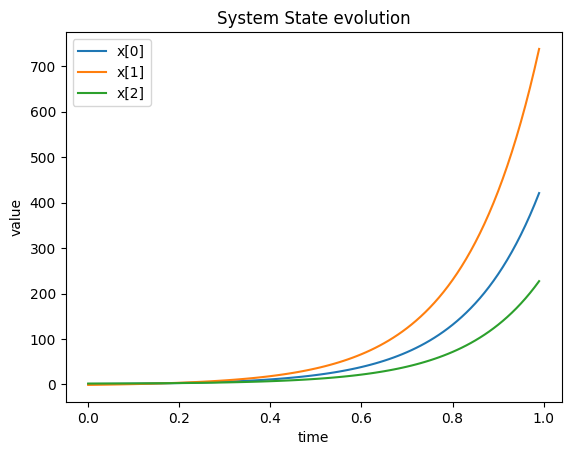

In [ ]:
A = np.array(
  [
      [1,2,3],
      [4,2,6],
      [1,1,1]
  ]
  )

nt = 100 #number of time steps
ts = 0.01 #time step size
x = np.zeros((3,nt)) #set up the state matrix to be 3 x "number of time steps"
x[:,0] = np.array([1,-1,2]) #initialize the value for time = 0

<your code>

print(f"Eigenvalues={D}\n Eigen Vector Matrix ={S})")
print(f"ANS: Number of unstable Eigenmodes={np.count_nonzero(np.real(D)>0)}")
i=1
tx = np.arange(0,ts*nt,ts) #generate the time values
for t in tx[1:]:
  eD = np.diag(np.exp(D*t))  #create the exponential diagonal matrix for each time
  x[:,i] = S @ eD @ Sinv @ x[:,0]
  i = i+1
plt.plot(tx,x[0,:])
plt.plot(tx,x[1,:])
plt.plot(tx,x[2,:])
plt.xlabel("time")
plt.ylabel("value")
plt.title("System State evolution")
plt.legend(["x[0]","x[1]","x[2]"])


---
**Schur's Decomposition**

$A$ is any square matrix, then there is a unitary matrix $U$ such that $U^{-1}AU=T$ where T is a triangular matrix and has $A$'s eigen values in the diagonal.

We can see this by construction (see pg 329-330 of Strang's book)

Let $\lambda_1$ be an eigen value and let $q_1$ be the corresponding unit eigen vector

Then in theory we can find $q_2,...,q_n$ which are orthogonal to q_1 and linearly independent, such that

$U_1 = \begin{bmatrix}q_1& q_2&..&q_n\end{bmatrix}$ and

$AU_1 = U_1 T_1$ where

$T_1 = \begin{bmatrix} \lambda_1 & * & *&...&* \\ 0 & * & * & ... & * \\ ... \\ 0 & * & * & ... & * \end{bmatrix}$

let $\lambda_2 $ be the second eigen value

and we can construct $U_2$ to make the second column 0 below diagonal.

This process can be repeated $n$ times to get

$A = QTQ^{-1}$ where $Q$ is orthogonal and $T$ is upper trianguar.

Example (see code below)

In [ ]:
#Example to get an A = UT
T = np.array([[1,2],[0,3]])
U = 1/np.sqrt(2)*np.array([[1,-1],[1,1]])
A = U @ T @ U.T
print(f"Example: {A}")
L, S = np.linalg.eig(A)
print(L)
print(S)
print(np.linalg.inv(U))

Example: [[ 1.00000000e+00 -2.23711432e-17]
 [-2.00000000e+00  3.00000000e+00]]
[1. 3.]
[[-7.07106781e-01 -7.85046229e-17]
 [-7.07106781e-01 -1.00000000e+00]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


---
**Power Iteration Method for finding Eigen Value**

This method works when the one eigen value has a larger magnitude than the others

Let $\lambda_1$ be the eigen value with largest magnitude.

Let $A=S\Lambda S^{-1}$ where $\begin{bmatrix}s_1 & s_2 & .. *&s_n \end{bmatrix}$ are the eigen vectors

let $v_0$ be a unit norm vector.

Then

for k=1,2,3... <br>
$\ \ $ $z_k = Aq_{k-1}$ <br>
$\ \ $ $q_k = z_k/||z_k||$ <br>
$\ \ $ $\lambda ^{(k)}= q_k^H A q_k$

converges to the largest eigen value and the corresponding eigen vector

Lets express the starting vector as linear combination of eigen vectors:

$q_0 = \Sigma a_i s_i$ <br>
Then,
$A^kq_0 = \Sigma \lambda_i^k a_i s_i = \lambda_1^k a_1 (s_1 + \Sigma_j \frac{\lambda_j^k}{\lambda_1^k} a_j/a_1 s_j)$

For large $k$m the terms related to $s_2, s_3...$ die down to 0 and we are left with a unit eigen vector along $s_1$

Thus $q_∞ = s_1/||s_1||$

and $\lambda^∞= q_∞^H A q_∞ = \lambda_1$




**QR Algorithm for finding eigen values**


Let $A_0 = A$

for k=1,2,.... <br>
$\ \ $ Factorize $A_{k-1}$ as $A_{k-1}=Q_k R_k$ <br>
$\ \ $ $A_k <= R_k Q_k$ <br>

Note that $A_k = R_k Q_k = Q_k^{-1}Q_k R_k Q_k = Q_k^{-1} A_{k-1} Q_k$ and are similar. Hence $A_0, A_1, .... $ share same eigen values

For more insight as to why this works, see chapter 7 of Golub




---
**Normal Matrices**

Normal matrices commute with their own conjugate transpose.

$AA^H = A^HA$

Normal matrices can be diagonalized with unitary matrices So these are nice matrices to work with!

From Schur decomposition theorem

$A = UTU^{-1}$, where $U$ is unitary and $T$ is triangular with eigenvalues in the diagonal.

Note for unitary matrix $U^H = U^{-1}$, the conjugate transpose is its inverse (if matrix is real, then it is called orthogonal matrix)

Then by normality condition, $AA^H = UTU^{-1}U^{-H}T^HU^H = A^HA = U^{-H}T^HU^HUTU^{-1}$
which after simplification leads to $TT^H = T^HT$

Which means that the triangle matrix is also normal.

By induction, starting with 2x2 matrices, we can then prove that $T$ is diagonal.

Hence any normal matrix $A$ is diagonalizable as $A=UDU^{-1}$ with a unitary matrix. In other words, the normal matrix has orthogonal eigenvectors.

All hermitian, skew-hermitian

---
**Spectral Theorem**

Every normal matrix can be diagonalized by an Unitary matrix $U$. That is:

$A = UDU^H$ where $D$ is diagonal with eigen values.


Let $U=\begin{bmatrix} u_1 & u_2 .. & u_n\end{bmatrix}$ and $D=diag(\lambda_1,\lambda_2,...\lambda_n)$, then $A=\lambda_1 u_1u_1^H + \lambda_2 u_2u_2^H + ... +\lambda_n u_nu_n^H$

decomposes A in to a sum of rank 1 projection matrices, each scaled by the corresponding eigen value.

---
**Q9**

If $CD = -DC$ and $D$ is invertible, then

a) Show that $C$ is similar to $-C$

b) Show that if $\lambda$ is an eigen value of $C$ then so is $-\lambda$

Ans:



---
**Q10**

What matrix changes the basis $U=\{\begin{bmatrix} 1 \\1 \end{bmatrix},\begin{bmatrix} 1 \\ 4 \end{bmatrix}\}$ to $V=\{\begin{bmatrix} 2 \\5 \end{bmatrix},\begin{bmatrix} 1 \\ 4 \end{bmatrix}\}$ ?

Ans:


Answer below from code



In [ ]:
#your code here
V = np.array([[2,1],[5,4]])
U = np.array([[1,1],[1,4]])
print(f"The matrix which changes basis from U to V is {<your code>}")

The matrix which changes basis from U to V is [[ 1.  0.]
 [-1.  1.]]


---
**Q11**

The derivative of $a + bx + cx^2$ is $b + 2c x + 0x^2$

a) Write it in a 3x3 matrix such that $D\begin{bmatrix} a \\ b \\c \end{bmatrix} = \begin{bmatrix} b \\ 2c \\ 0 \end{bmatrix}$

b) What is $D^3$ and interpret in terms of derivative

c) What are the eigen values and eigen vectors of D?

Ans:

(a).
Given that $D \begin{bmatrix} a \\ b \\c \end{bmatrix} = \begin{bmatrix} b \\ 2c \\ 0 \end{bmatrix}$, we can obtain
\begin{equation*}
    \boxed{
    D
    =
    \begin{bmatrix}
        0 & 1 & 0 \\
        0 & 0 & 2 \\
        0 & 0 & 0
    \end{bmatrix}
    }
\end{equation*}

(b).
\begin{equation*}
    \implies
    D^2
    =
    \begin{bmatrix}
        0 & 0 & 2 \\
        0 & 0 & 0 \\
        0 & 0 & 0
    \end{bmatrix}
    \quad \text{and} \quad
    \boxed{
    D^3
    =
    \begin{bmatrix}
        0 & 0 & 0 \\
        0 & 0 & 0 \\
        0 & 0 & 0
    \end{bmatrix}
    }
\end{equation*}

The first, second and third derivatives of the function $a + bx + cx^2$ are $b + 2cx + 0x^2$, $2c + 0x + 0x^2$, and $0 + 0x + 0x^2$ respectively.\
Thus, the third derivative is zero.

(c).
We can find the characteristic equation of $D$ as $\text{det}(D - \lambda I) = 0 \implies \lambda^3 = 0$.\
Thus, the eigenvalues of $D$ are $\boxed{\{0, 0, 0\}}$.

The eigensubspace of $D$ is given by $\text{null}(D) = \text{span}\left\{\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}\right\}$

We can see that the dimension of the eigenspace is 1, which is less than the algebraic multiplicity 3.


In [1]:
D = np.array([[0,1,0],[0,0,2],[0,0,0]])
<your code>
print(f"Eigen values are {L}")
print(f"Eigen vectors are {S}")

SyntaxError: invalid syntax (4289268685.py, line 2)

---
**Q12**


Let G be linear transformation that operates on 2 x 2 matrices as

$G: ℝ^{2x2} → ℝ^{2x2}$ such that $G(A) = A^T$, where $A$ is a 2x2 matrix.

What are the eigenvalues and eigenmatrices for $G$?




Ans:





In [ ]:
G = np.array([
    [1,0,0,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,0,0,1]
  ])

<your code>
print(f"Eigen values = {D}")
print(f"Eigen Vectors = {S}")

Eigen values = [ 1. -1.  1.  1.]
Eigen Vectors = [[ 0.          0.          1.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.        ]]


Contd...

Eigen matrices are:


---
**Q13**

For a square $A$ show that the left and right eigenspaces corresponding to different eigen values are orthogonal


Ans:

Let $\mathbf{u}_i^T \mathbf{A} = \lambda _i \mathbf{u}_i^T$ and $\mathbf{A} \mathbf{v}_j = \lambda _j \mathbf{v}_j$ be the left and right eigen vector equations, respectively.

Then, we have, for $\lambda_i \neq \lambda_j$,
\begin{align*}
    (\mathbf{u}_i^T \mathbf{A}) \mathbf{v}_j
    &=
    \mathbf{u}_i^T (\mathbf{A} \mathbf{v}_j)
    \\
    \implies
    \lambda_i \mathbf{u}_i^T \mathbf{v}_j
    &=
    \lambda_j \mathbf{u}_i^T \mathbf{v}_j
    \\
    \implies
    (\lambda_j - \lambda_i) \mathbf{u}_i^T \mathbf{v}_j
    &=
    0
    \\
    \implies
    \mathbf{u}_i^T \mathbf{v}_j
    &=
    0
\end{align*}

Thereby, the left and right eigenspaces corresponding to different eigenvalues are orthogonal.


---
**Q14**

a) If $A^2 = -I$ what are the eigen values of $A$

b) if A is a real n x n matrix, show that n must be even.


Ans:




---
**Positive Definite Matrices**

(I) A symmetric matrix for which $x^TAx > 0$ if $x \neq 0$ is called a positive definite matrix.

(II) We know from earlier that a real symmetic matrix has real eigenvalues. In addition, if it is positive definite, its eigen values are positive.

$Ax = \lambda x$ so $x^TAx = \lambda x^Tx >0$ and since $x^Tx>0$ this means $\lambda > 0$

Conversely if a symmetric matrix has positive eigenvalues, then it is positive definite.

To see this, recall from our discussion on diagonalization, we know that a symmetric matrix is diagonalizable as $A=Q\lambda Q^{-1}$, where $Q$ is orthogonal and hence $Q^{-1}= Q^T$.

Which means that for any $x \neq 0$, $x^TAx = x^TQ^TDQx = \sum \lambda_i ||q_i^Tx||^2 > 0$

(III)  The pivots of A are positive. To see this,  $A=LDL^T$ with $D$ containing the pivots.
Let $D= diag(d_1, d_2, ...,d_n)$ and $L=\begin{bmatrix} l_1 & l_2 &... 7l_n \end{bmatrix}$. Lets focus on $d_i$ and show that it is positive. Consider the subspace spanned by $\{l_1, l_2, l_{i-1}, l_{i+1},...\}$, ie. all columns except the $i^{th}$ one. Then, we can find a vector $x$ orthogonal to the subspace spanned by this set and hence $x^TAx = x^TLDL^Tx = d_i||l_i^Tx||^2 > 0$ and implies $d_i > 0$

Converse is easy to prove.



---
**Multi-variate function optimization**

Positive definite matrices naturally arise when one tries to optimize a multi-variable function
Lets try to find the extrema of $F(x):ℝ^n → ℝ$ where $x\inℝ^n$. Assume that $F$ and its derivatives upto second order exist.

Just like in single variable case, we can write $F$ as a Taylor approximation around a point $x_0$ with as:

 $F(h) = F(x_0) + h^T ∇F(x_0) + \frac{1}{2}h^T H(x_0) h\ +\ $terms of higher order.

Here $h \in ℝ^n$ and is small in magnitude.

$\nabla F = \begin{bmatrix} \frac{dF}{dx_1} \\ \frac{dF}{dx_2} \\ .. \\\frac{dF}{dx_n} \end{bmatrix}$ is the gradient vector and points to the direction of steepest change of the function.

At a point of extrema - gradient vector is 0. And hence it is a necessary condition.

i.e $\nabla F = 0$

To determine whether it is a minima or maxima or neither, we need to look at the next term, which is a quadractic term.

If $h^T H(x_0) h > 0 $ for all $h \neq 0$, then it means that no matter which direction we move, the value of $F(x_0+h)$ will increase implying that $x_0$ is a minima. In other words, $H(x_0)$ has to be positive definite. The function $F$ in the neighbourhood of $x_0$ is shaped like a bowl facing upwards towards positive values of $F$

If $h^T H(x_0) h < 0 $ for all $h \neq 0$, then it means that no matter which direction we move, the value of $F(x_0+h)$ will decrease implying that $x_0$ is a maxima. In other words, $H(x_0)$ has to be negative definite.

When $h^T H h \geq 0$ for $h \neq 0$ then $H$ is positive semi-definite and we can say that $F$ is non-decreasing as you move away from $x_0$.

However if $h^T H h$'s sign depends on h, then it is a saddle point (shaped like a horse's saddle)

---
**Q15**

Show that the diagonal entries of a positive definite matrix are positive.

Ans:

We will show it using proof by contradiction.

Suppose $\mathbf{A}$ was a positive definite matrix with a non-positive diagonal entry $a_{ii}$, i.e., $a_{ii} \leq 0$.
Then, taking $\mathbf{x} = \mathbf{e}_i$ (the $i$-th standard basis vector), we can get $\mathbf{x}^T\mathbf{A}\mathbf{x} = a_{ii} \leq 0$, which contradicts the positive definiteness of $\mathbf{A}$.

More specifically, with $\mathbf{A} = \begin{bmatrix} \mathbf{a_{1}} & \mathbf{a_{2}} & \cdots & \mathbf{a_{n}} \end{bmatrix}$, where $\mathbf{a_{j}}$ is the $j$-th column of $\mathbf{A}$, we have
\begin{equation*}
    \mathbf{e_i}^T\mathbf{A}\mathbf{e_i}
    = \mathbf{e_i}^T(\mathbf{A}\mathbf{e_i})
    = \mathbf{e_i}^T\mathbf{a_i}
    = a_{ii} \leq 0
\end{equation*}

Thus, the diagonal entries of a positive definite matrix cannot be negative or zero.

Thereby, a positive definite matrix <u>necessarily has positive diagonal entries</u>.

Alternatively, we can also show this by considering the eigenvalues of a positive definite matrix.
Since $\mathbf{A}$ is also a symmetric matrix, we have that it is diagonalizable as $\mathbf{A} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$, where $\mathbf{Q}$ is orthogonal and $\mathbf{\Lambda}$ is a diagonal matrix with the eigenvalues of $\mathbf{A}$.
The eigenvalues of a symmetric matrix are real and positive, and thus the diagonal entries of $\mathbf{\Lambda}$ are positive.
Since $\mathbf{A} \sim \mathbf{\Lambda}$, the diagonal entries of $\mathbf{A}$ are also positive.


---
**Q16**
If A, B are positive definite, show that A+B is also positive definite

Ans:

Let $\mathbf{A}$ and $\mathbf{B}$ be positive definite matrices.
Then, for any non-zero vector $\mathbf{x}$, we have that $\mathbf{x}^T\mathbf{A}\mathbf{x} > 0$ and $\mathbf{x}^T\mathbf{B}\mathbf{x} > 0$.
From this, we can observe that $\mathbf{x}^T(\mathbf{A} + \mathbf{B})\mathbf{x} = \mathbf{x}^T\mathbf{A}\mathbf{x} + \mathbf{x}^T\mathbf{B}\mathbf{x} > 0$.
Thereby, <u>$\mathbf{A} + \mathbf{B}$ is also positive definite<u>.
